# Experiment 01: Influence of number of centers

In [7]:
%matplotlib inline

import os
import sys
import copy
import time
import pickle
from array import array
import numpy as np
np.seterr(over='ignore')
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy import optimize
from scipy.interpolate import RegularGridInterpolator
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from ipywidgets import interact, interactive, fixed, FloatSlider

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

# VarClump functions
sys.path.append('../lib/')
from utils import *
from graph import *
from points_generation import *
from initial_guess import *
from variational import *
from gmr import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading data 2D

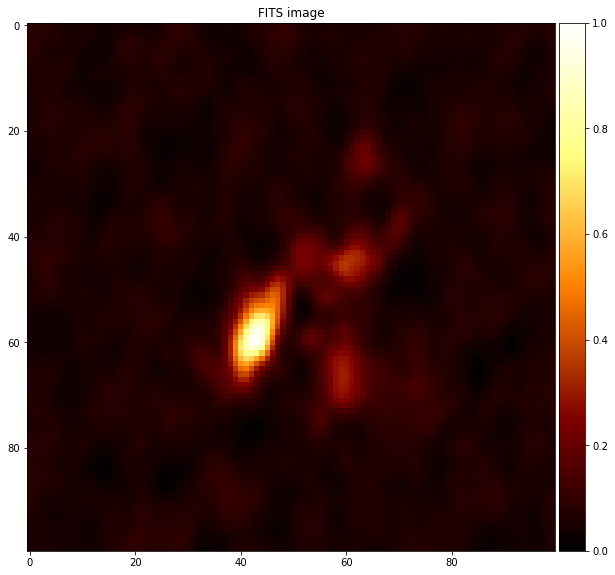

In [8]:
"""
Loading data
"""

fits_path = '../data/images/Orion.cont.image.fits'
x, y, data, dfunc = load_data(fits_path)
image_plot(data)

In [9]:
base_level = estimate_rms(data)
interact(thresholded_image_plot, data=fixed(data), level=FloatSlider(min=base_level,max=1.,step=0.01,value=base_level))

/Users/mavillan/anaconda3/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


<function graph.thresholded_image_plot>

In [ ]:
# common parameters
minsig = ( 0.5*(1./data.shape[0] + 1./data.shape[1]) ) / 6.
maxsig = 30*minsig


elm_list = list()

for Nc in range(50, 501, 25):
    # number of points of each type
    Nb = int(Nc*0.2)
    Ne = 4*Nc-Nb
    
    # points generation
    center_points = random_centers_generation(data, Nc, base_level=base_level, power=5.)
    collocation_points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
    boundary_points = boundary_points_generation(data, base_level, Nb)
    
    # right format
    xc = center_points[:,0]
    yc = center_points[:,1]
    xe = collocation_points[:,0]
    ye = collocation_points[:,1]
    xb = boundary_points[:,0]
    yb = boundary_points[:,1]
    
#    # visualizing the choosen points
#    points_plot(data, center_points=center_points, title="Center Points")
#    points_plot(data, center_points=collocation_points, title="Collocation Points")


    ####################################
    # Initial parameters estimation
    ####################################
    #c0, sig0 = estimate_initial_guess(center_points, f, R=0.009, method='mean_dist')
    c0, sig0 = estimate_initial_guess(center_points, dfunc, minsig=minsig, maxsig=maxsig, method='min_dist')
    #c0, sig0 = _estimate_initial_guess(dfunc, data, center_points, base_level)


#    solution_plot(dfunc, c0, sig0, xc, yc, dims=data.shape, base_level=base_level)
#    params_plot(c0, sig0, xc, yc)
#    params_distribution_plot(c0, sig0)
    elm_list.append(ELModel(data, dfunc, data.shape, xe, ye, xc, yc, xb, yb, c0, sig0, a=0., b=0., d1psi1=d1psi, 
                    d1psi2=d1psi, d2psi2=d2psi, base_level=base_level, pix_freedom=1.))

##########################################################################################
Processing 50 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 20100.
nfev: 20110

Residual stats:
Residual RMS: 0.029619418069805156
Residual Variance: 0.0008482933841196657
Flux Lost: 0.06016757927178208
Flux Addition: 0.03495727248490502
Psi1(u-f): 0.10065996781622
#Exceeded Pixels: 415
Sharpness: 3.570117824776383
Psi2(grad u): 0.043680237356120685
Total elapsed time: 7.888592720031738 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.22981267802229924
Mean min distance between collocation and center poin

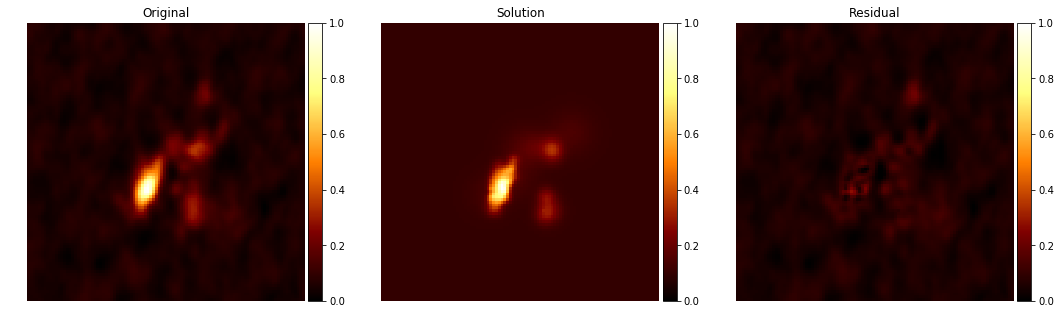

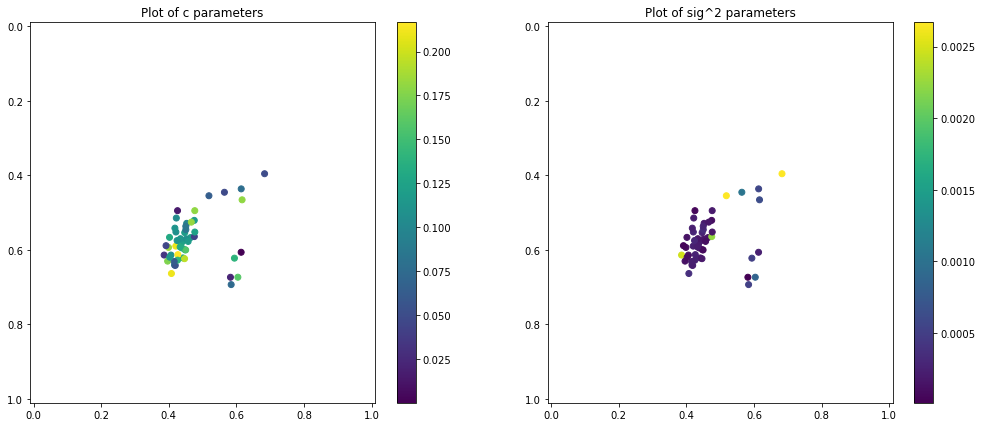

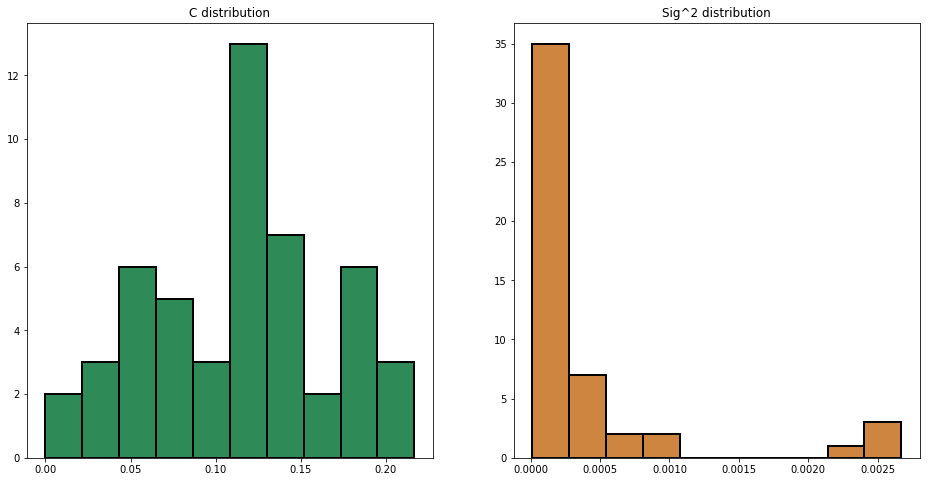

##########################################################################################
Processing 75 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 30100.
nfev: 30113

Residual stats:
Residual RMS: 0.01980134246745366
Residual Variance: 0.00037810152916196836
Flux Lost: 0.038271213247428625
Flux Addition: 0.020765108539948854
Psi1(u-f): 0.01795858244255471
#Exceeded Pixels: 427
Sharpness: 3.7005536647924338
Psi2(grad u): 0.02790568208452965
Total elapsed time: 19.022833108901978 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.24032459722590696
Mean min distance between collocation and cente

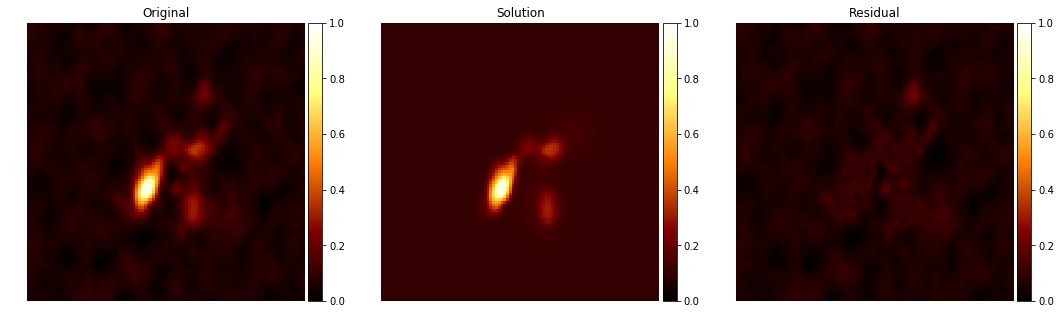

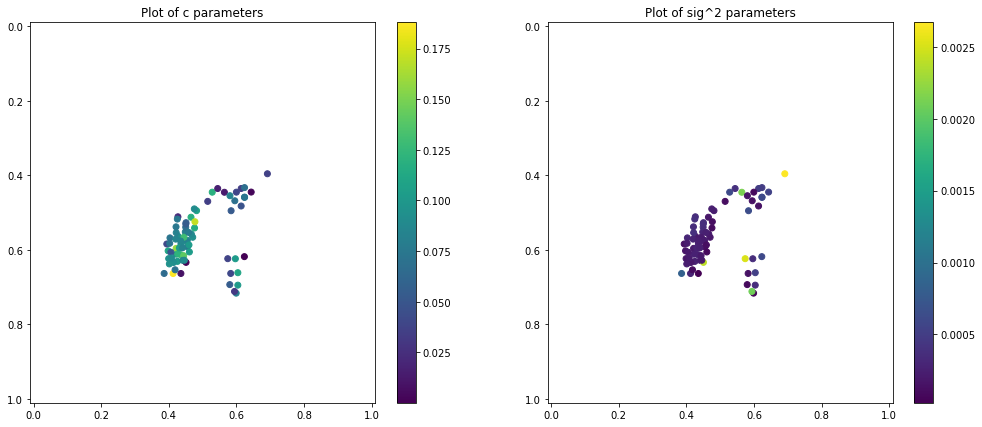

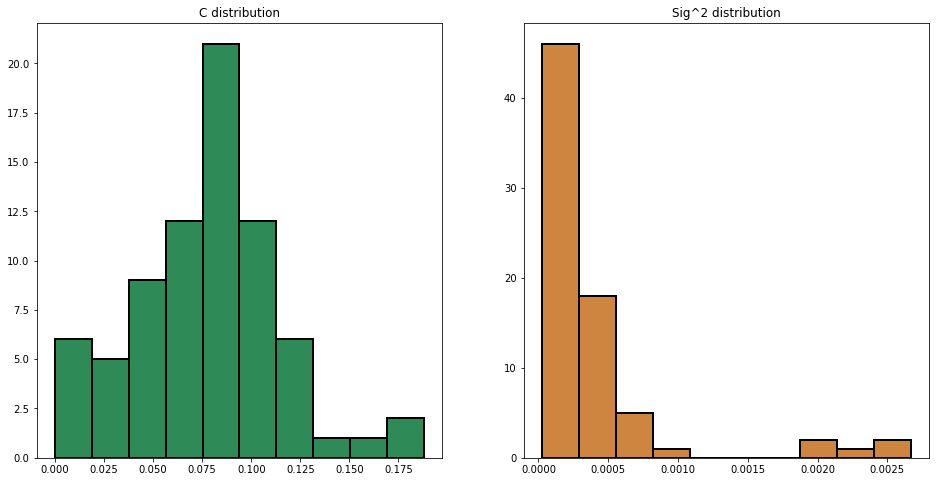

##########################################################################################
Processing 100 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 40100.
nfev: 40115

Residual stats:
Residual RMS: 0.012745567874289007
Residual Variance: 0.00015980518276086106
Flux Lost: 0.025043556980540626
Flux Addition: 0.01743307587012797
Psi1(u-f): 0.011698798921087588
#Exceeded Pixels: 446
Sharpness: 3.7485201246238726
Psi2(grad u): 0.02866797411661135
Total elapsed time: 38.09391927719116 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.24027055489978089
Mean min distance between collocation and cent

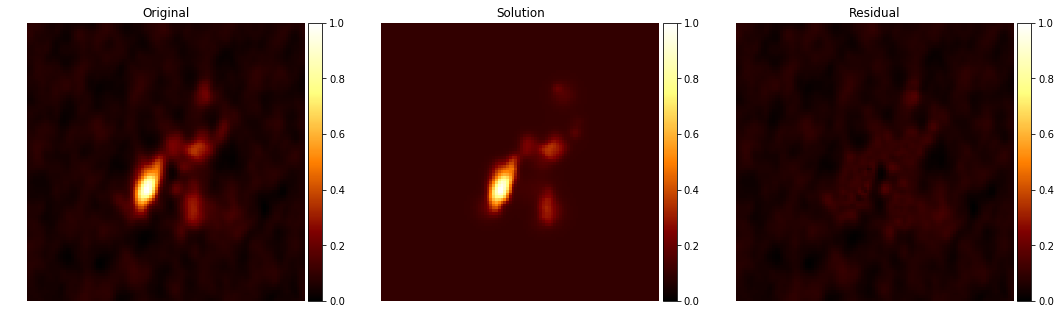

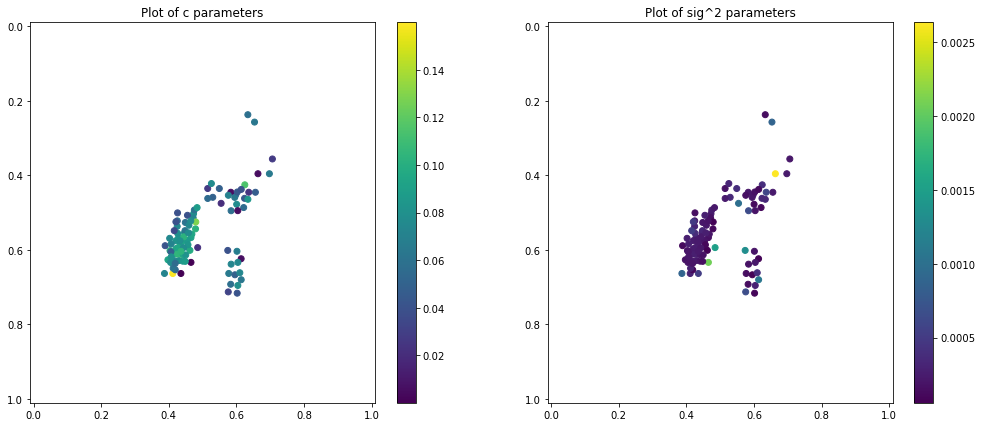

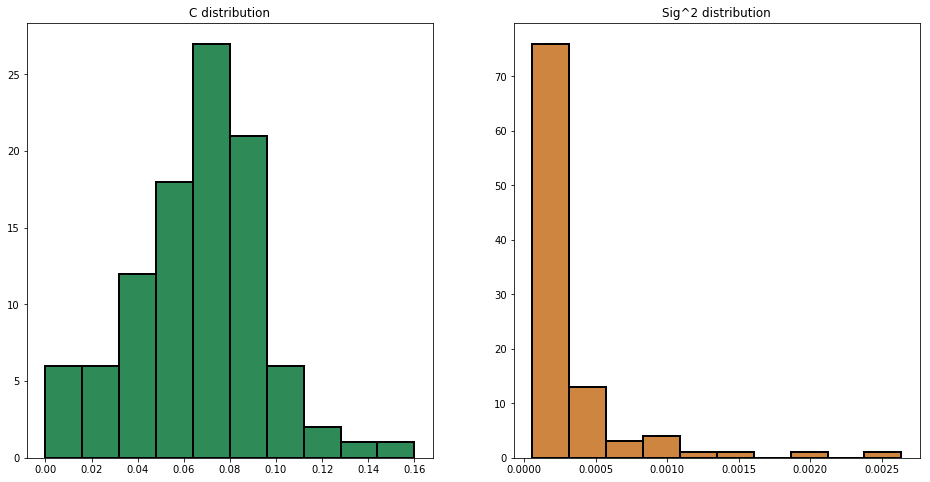

##########################################################################################
Processing 125 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 50100.
nfev: 50115

Residual stats:
Residual RMS: 0.01105194191283686
Residual Variance: 0.00012022030089067805
Flux Lost: 0.020803008018362216
Flux Addition: 0.014309429358034635
Psi1(u-f): 0.009629381577249716
#Exceeded Pixels: 452
Sharpness: 3.683833061920183
Psi2(grad u): 0.026081619921688937
Total elapsed time: 61.877713203430176 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.21066096860999467
Mean min distance between collocation and cen

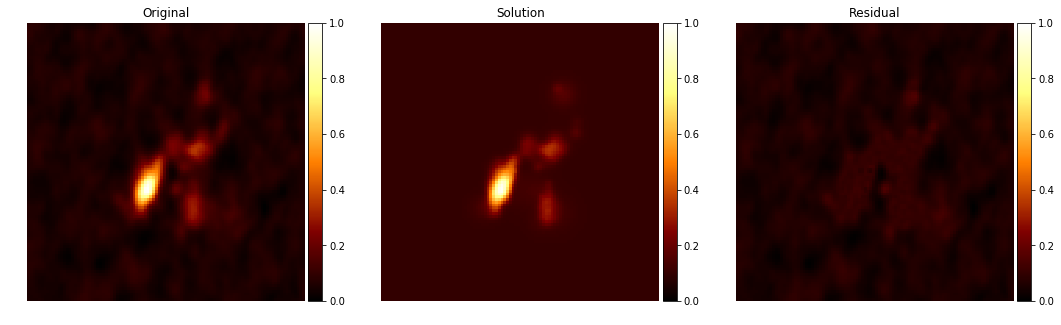

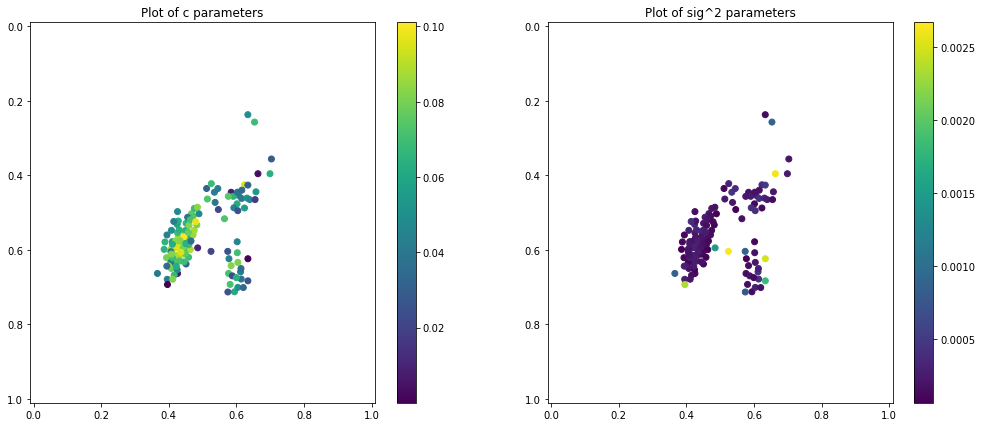

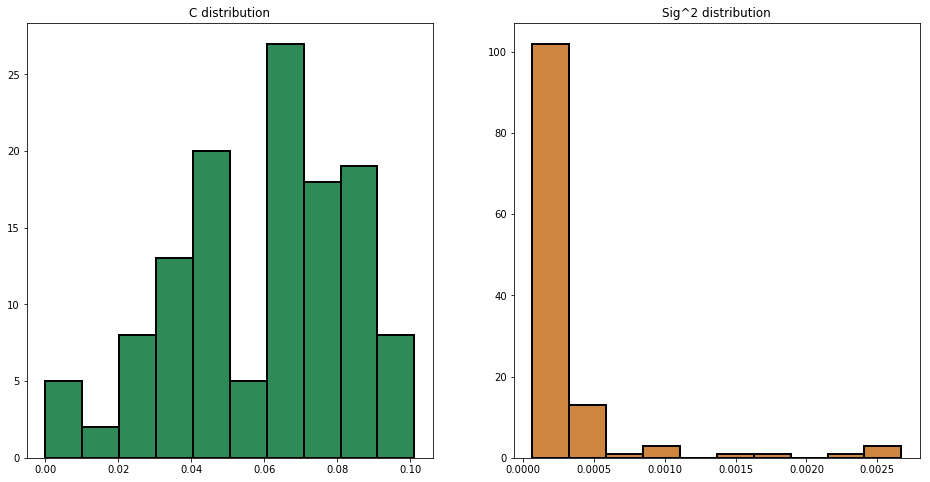

##########################################################################################
Processing 150 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 60100.
nfev: 60112

Residual stats:
Residual RMS: 0.00806112010689375
Residual Variance: 6.334214666679423e-05
Flux Lost: 0.01615473598929609
Flux Addition: 0.010162175488508183
Psi1(u-f): 0.002680121192578563
#Exceeded Pixels: 418
Sharpness: 3.762148610791576
Psi2(grad u): 0.025173832182455377
Total elapsed time: 93.70681691169739 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.15287975329972892
Mean min distance between collocation and center

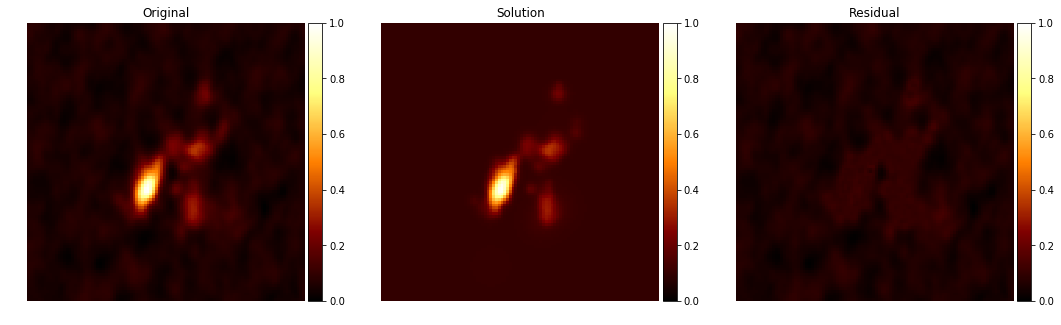

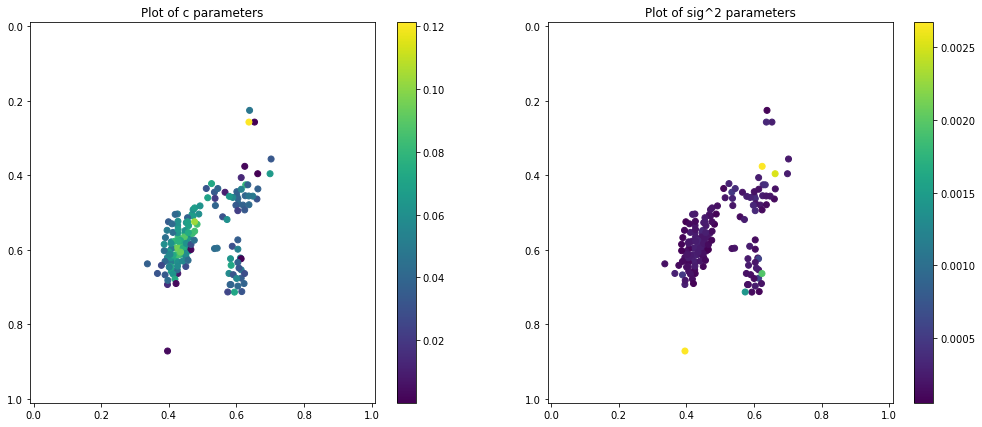

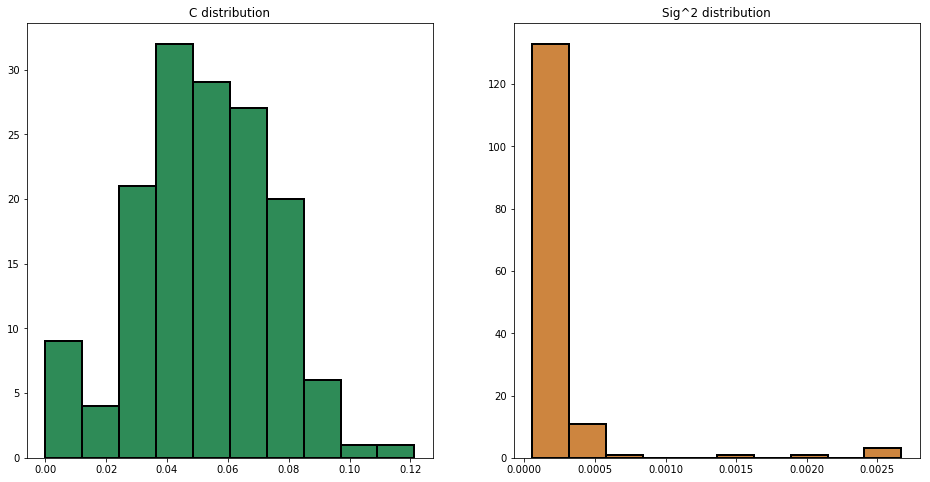

##########################################################################################
Processing 175 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 70100.
nfev: 70114

Residual stats:
Residual RMS: 0.006861634648004659
Residual Variance: 4.631669987208399e-05
Flux Lost: 0.013168479004238879
Flux Addition: 0.009074178495255944
Psi1(u-f): 0.0017845300166843409
#Exceeded Pixels: 435
Sharpness: 3.7731558168382864
Psi2(grad u): 0.02528124762417269
Total elapsed time: 143.4871916770935 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.14791826421781779
Mean min distance between collocation and cen

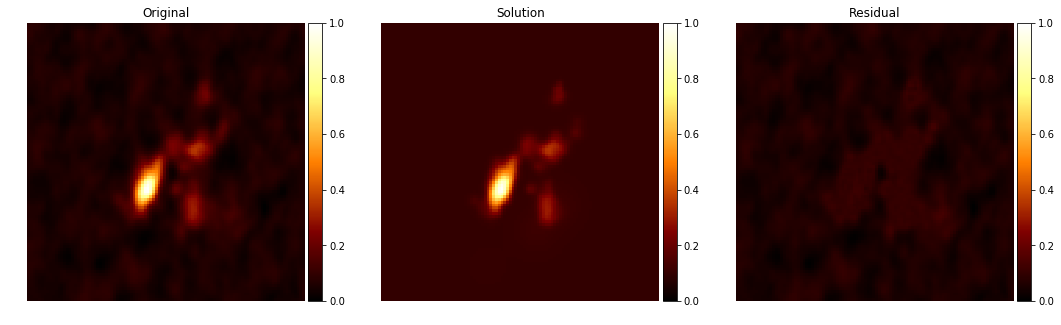

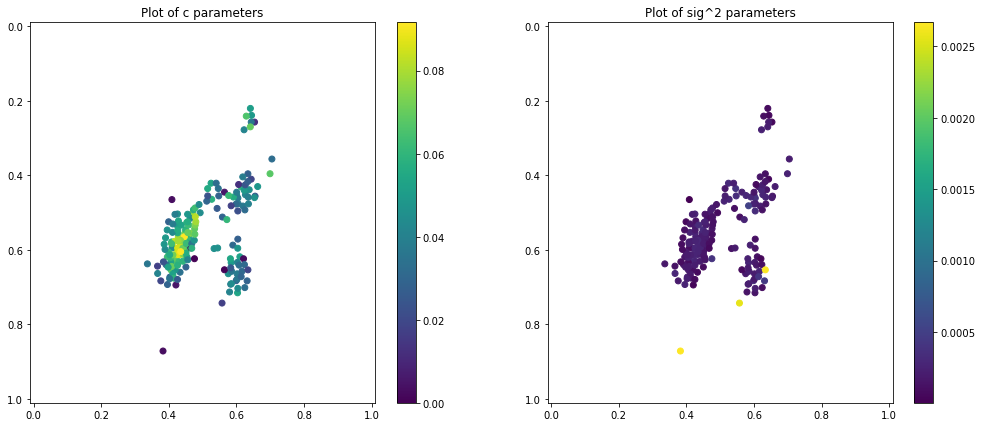

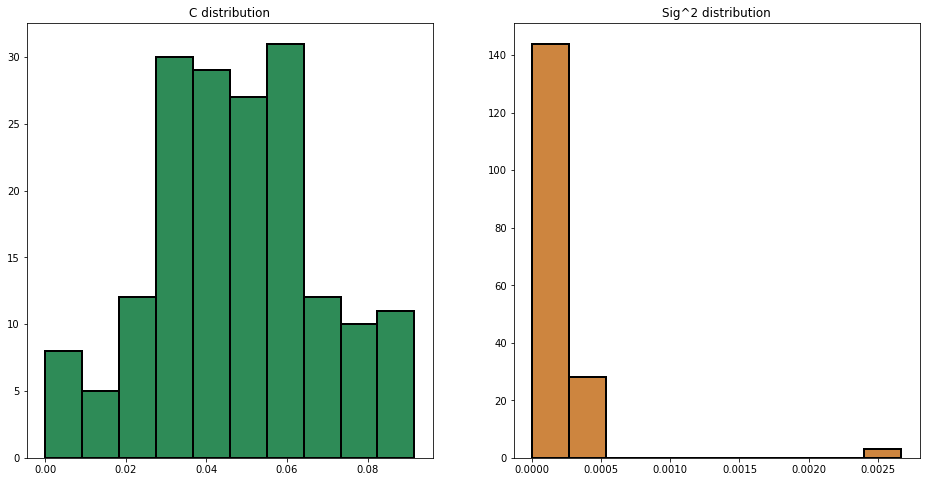

##########################################################################################
Processing 200 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 80100.
nfev: 80113

Residual stats:
Residual RMS: 0.005521632268641714
Residual Variance: 3.0067853969762392e-05
Flux Lost: 0.0107625120885666
Flux Addition: 0.007727405857407528
Psi1(u-f): 0.000898967698698366
#Exceeded Pixels: 437
Sharpness: 3.7929095942680022
Psi2(grad u): 0.025126735328347225
Total elapsed time: 272.5835347175598 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.09482373120701823
Mean min distance between collocation and cent

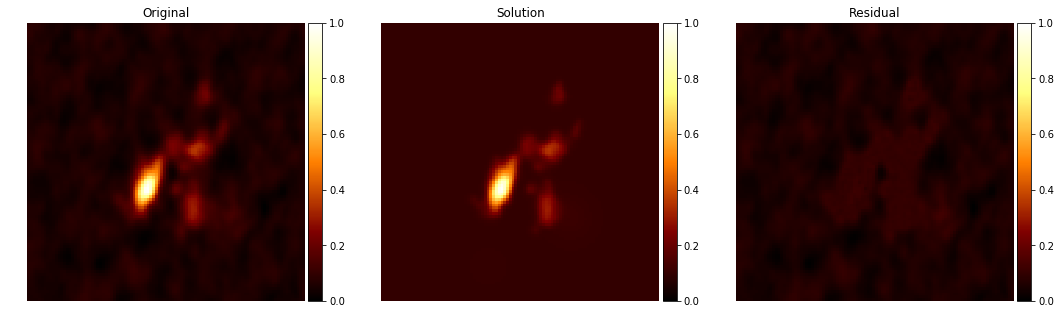

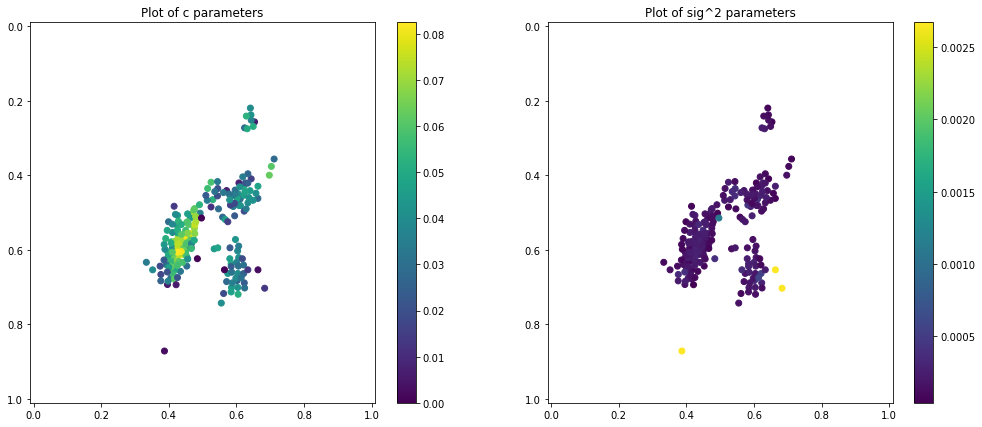

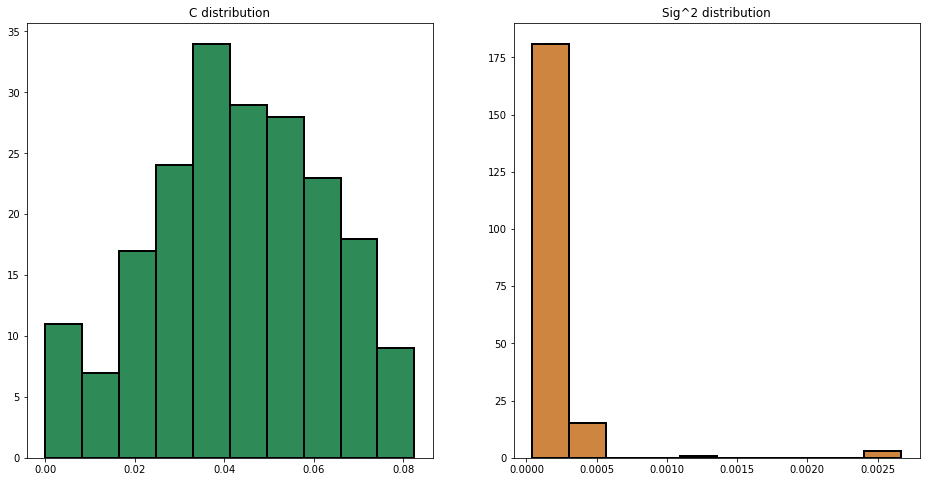

##########################################################################################
Processing 225 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 90100.
nfev: 90114

Residual stats:
Residual RMS: 0.00562135671864582
Residual Variance: 3.120272976752511e-05
Flux Lost: 0.010641898860877904
Flux Addition: 0.007693354542800938
Psi1(u-f): 0.0009908660282198947
#Exceeded Pixels: 447
Sharpness: 3.7989283254550426
Psi2(grad u): 0.025064148550439834
Total elapsed time: 343.65642285346985 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.09489969802403822
Mean min distance between collocation and ce

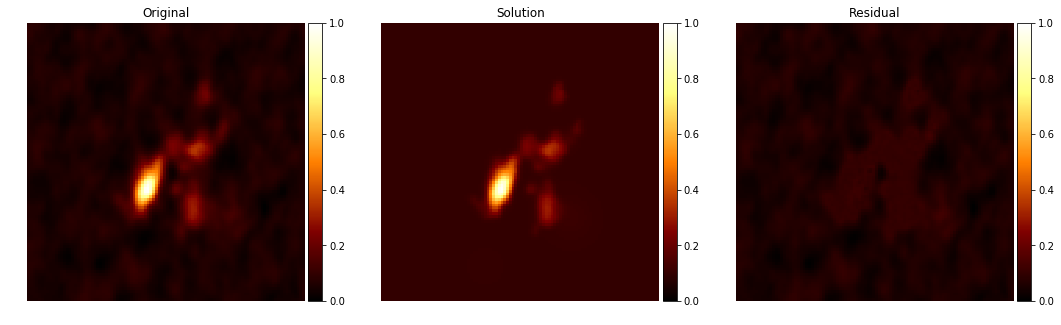

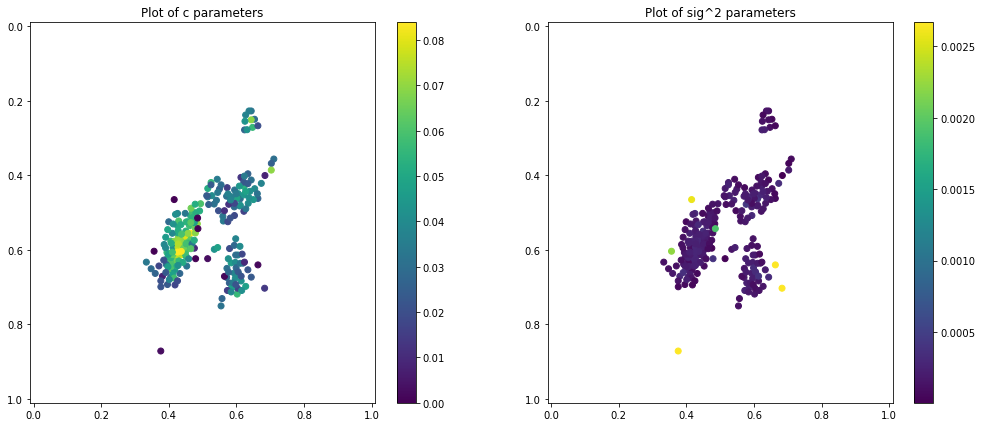

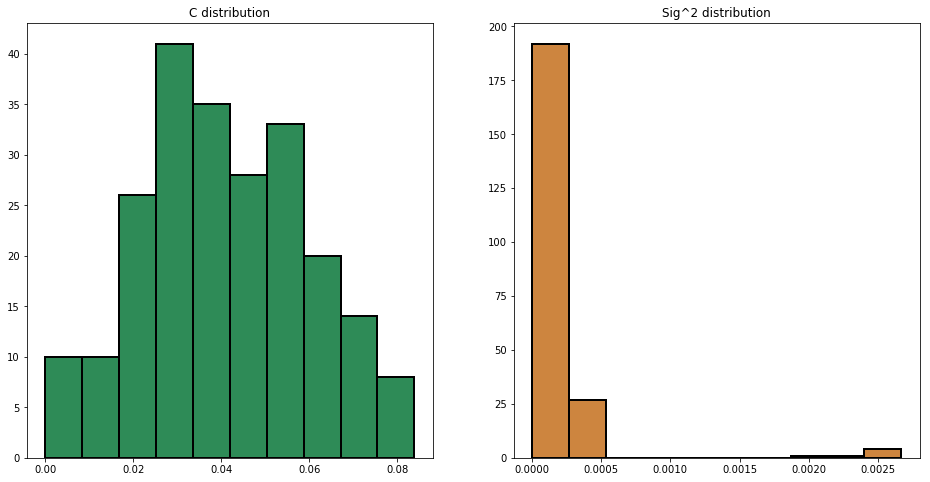

##########################################################################################
Processing 250 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100100.
nfev: 100112

Residual stats:
Residual RMS: 0.005092067485428404
Residual Variance: 2.556030934220928e-05
Flux Lost: 0.009758536409762646
Flux Addition: 0.006916200228150242
Psi1(u-f): 0.0007053068836821972
#Exceeded Pixels: 446
Sharpness: 3.800308810689609
Psi2(grad u): 0.024889365843638572
Total elapsed time: 360.0769979953766 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.09478658878277585
Mean min distance between collocation and c

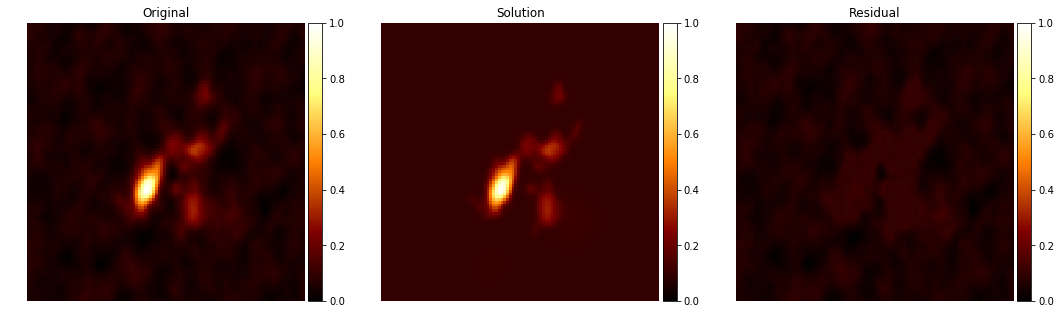

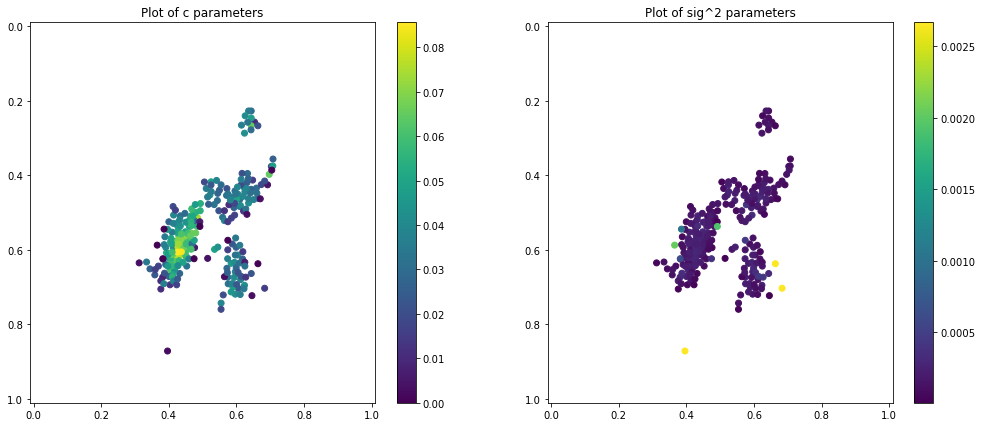

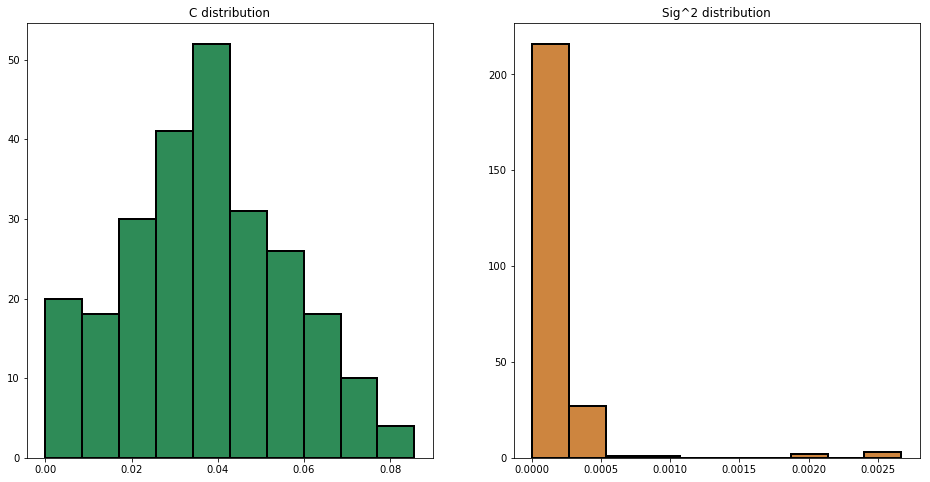

##########################################################################################
Processing 275 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 110100.
nfev: 110116

Residual stats:
Residual RMS: 0.004868063964318576
Residual Variance: 2.3394989006138402e-05
Flux Lost: 0.009255912250277972
Flux Addition: 0.006679484318789825
Psi1(u-f): 0.0006348155938912894
#Exceeded Pixels: 441
Sharpness: 3.8033545117766985
Psi2(grad u): 0.024802171474173393
Total elapsed time: 1263.5449390411377 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.10719302470850944
Mean min distance between collocation an

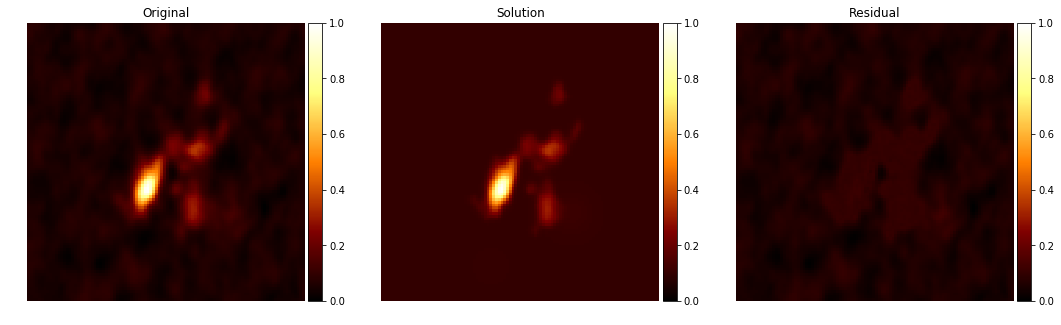

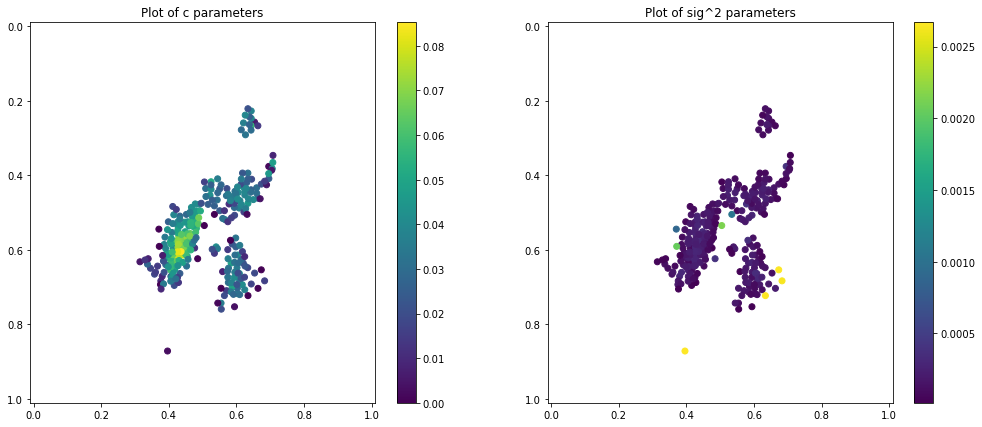

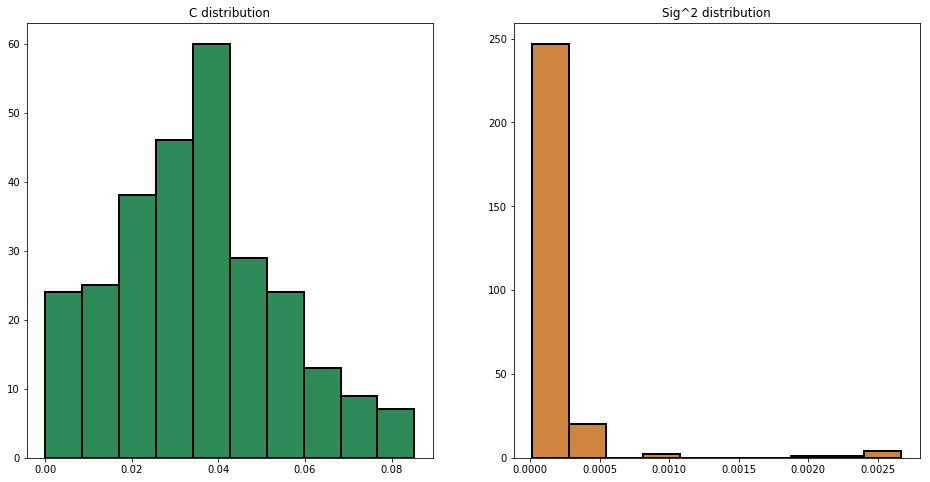

##########################################################################################
Processing 300 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120111

Residual stats:
Residual RMS: 0.0042488118379090094
Residual Variance: 1.7853253095775288e-05
Flux Lost: 0.008182735711500843
Flux Addition: 0.006094188505301528
Psi1(u-f): 0.0005649264129253288
#Exceeded Pixels: 443
Sharpness: 3.8072687165431067
Psi2(grad u): 0.024911924477129255
Total elapsed time: 628.267336845398 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06472253060734241
Mean min distance between collocation and

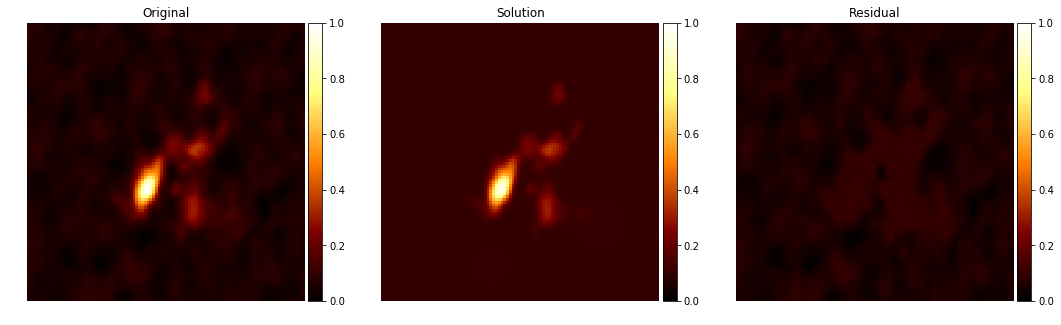

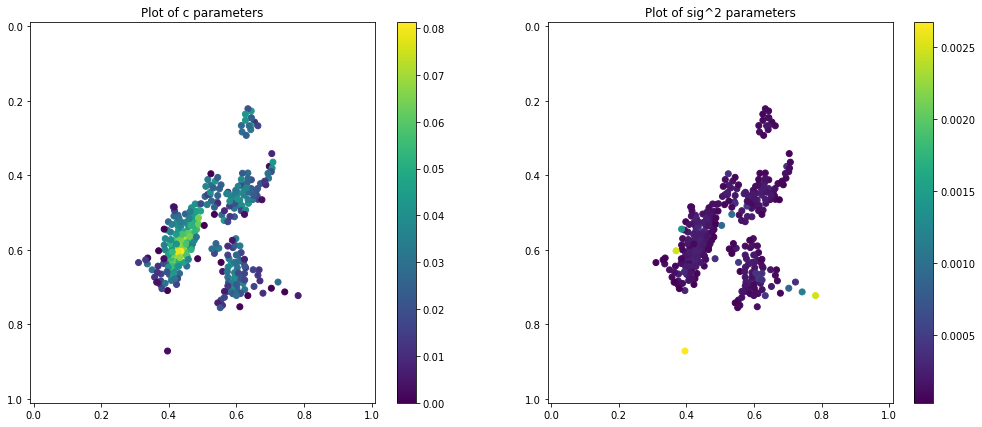

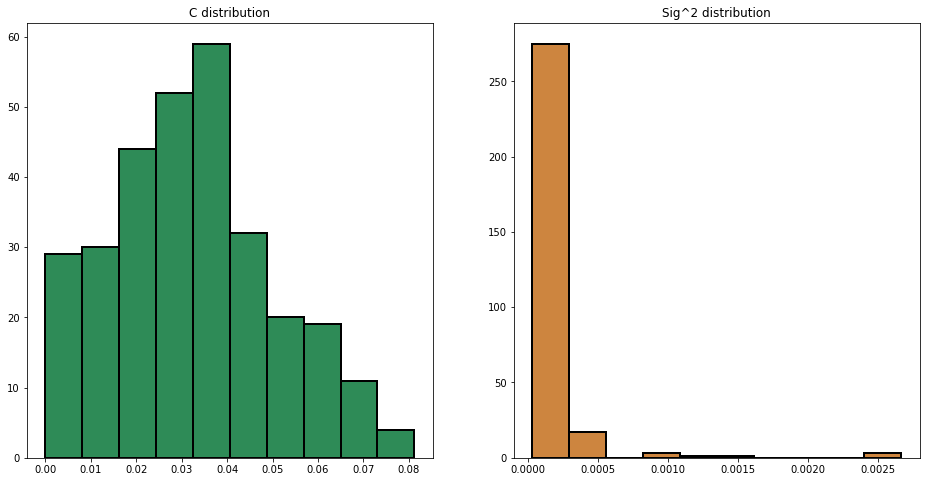

##########################################################################################
Processing 325 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 130100.
nfev: 130108

Residual stats:
Residual RMS: 0.003775441672022235
Residual Variance: 1.3894804353249355e-05
Flux Lost: 0.007669689004491809
Flux Addition: 0.00486492362455079
Psi1(u-f): 0.00028646041111282303
#Exceeded Pixels: 432
Sharpness: 3.8265711128670787
Psi2(grad u): 0.024983595056183243
Total elapsed time: 764.7609331607819 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.05028941303408215
Mean min distance between collocation and

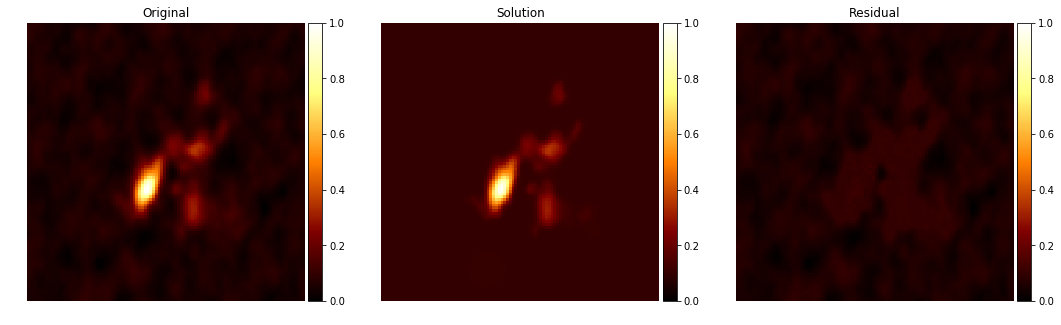

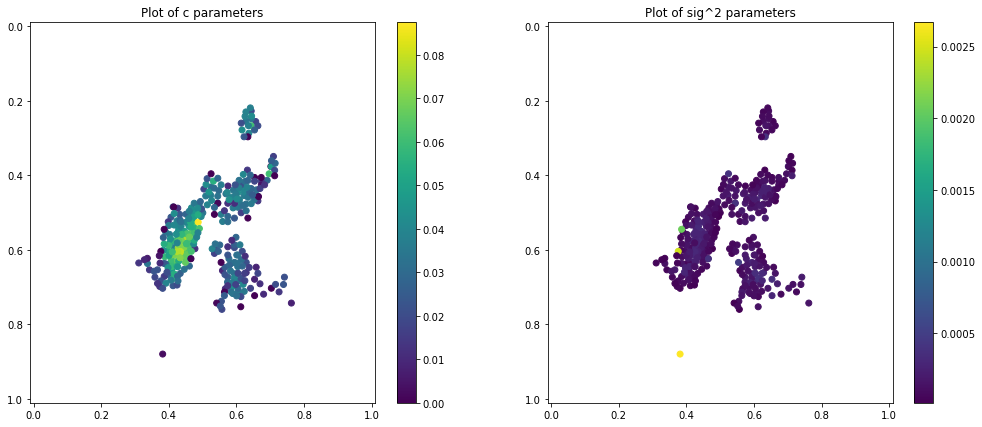

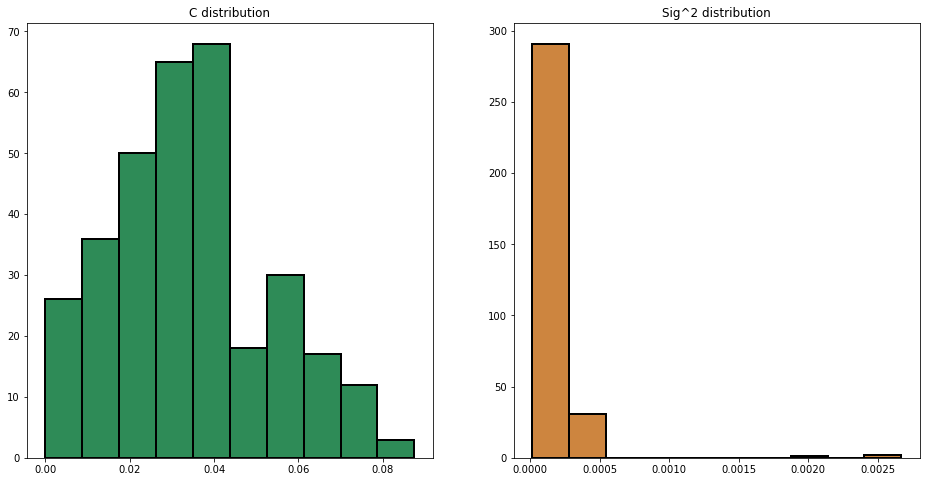

##########################################################################################
Processing 350 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 140100.
nfev: 140108

Residual stats:
Residual RMS: 0.0037009734352822054
Residual Variance: 1.3439721203241241e-05
Flux Lost: 0.007273774294793928
Flux Addition: 0.004898959652295389
Psi1(u-f): 0.00029694478973696164
#Exceeded Pixels: 438
Sharpness: 3.826654937882997
Psi2(grad u): 0.02503316468387055
Total elapsed time: 891.5034868717194 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.03068191023375202
Mean min distance between collocation and

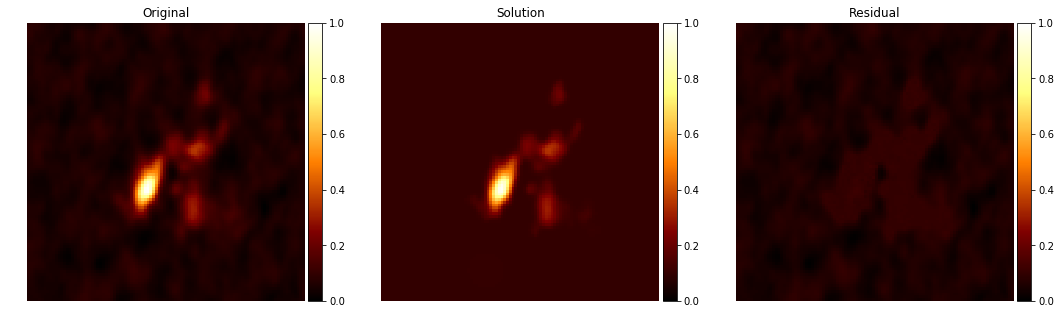

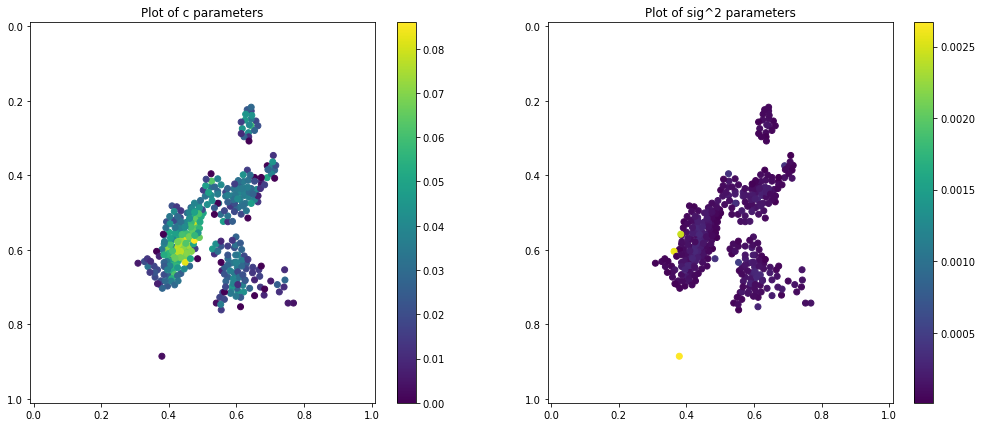

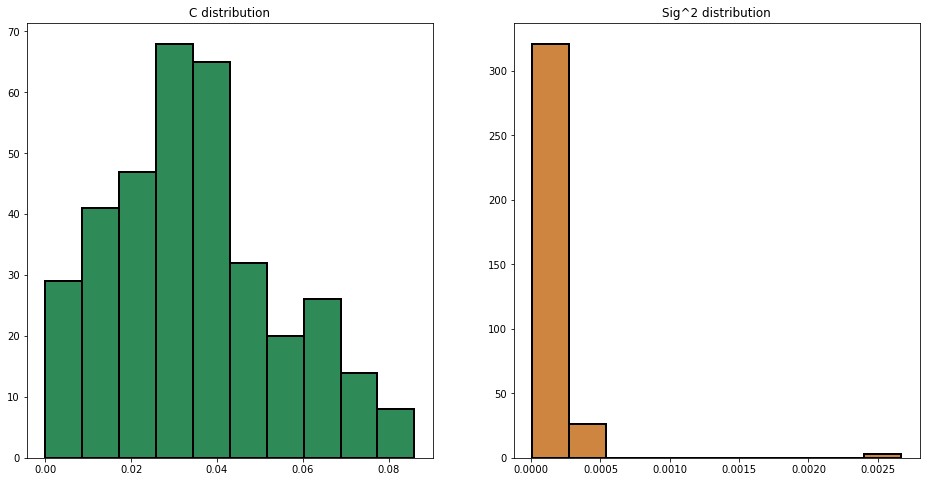

##########################################################################################
Processing 375 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 150100.
nfev: 150117

Residual stats:
Residual RMS: 0.003790726772116381
Residual Variance: 1.4106510341382454e-05
Flux Lost: 0.007327360261762852
Flux Addition: 0.004926786828565355
Psi1(u-f): 0.00039216486990083607
#Exceeded Pixels: 433
Sharpness: 3.827240675802878
Psi2(grad u): 0.024994055626840213
Total elapsed time: 1097.209881067276 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.025501668452465057
Mean min distance between collocation an

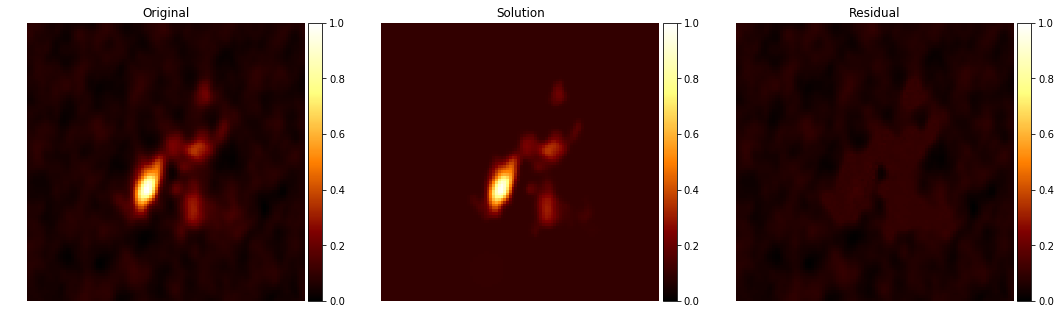

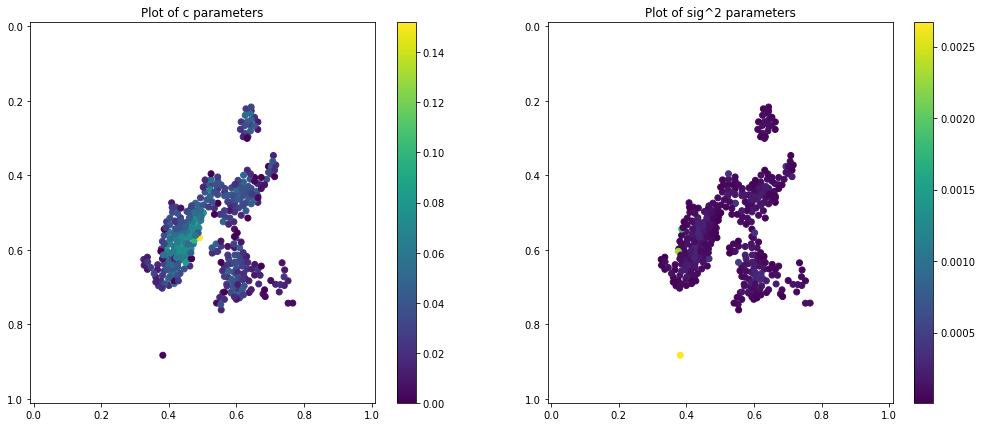

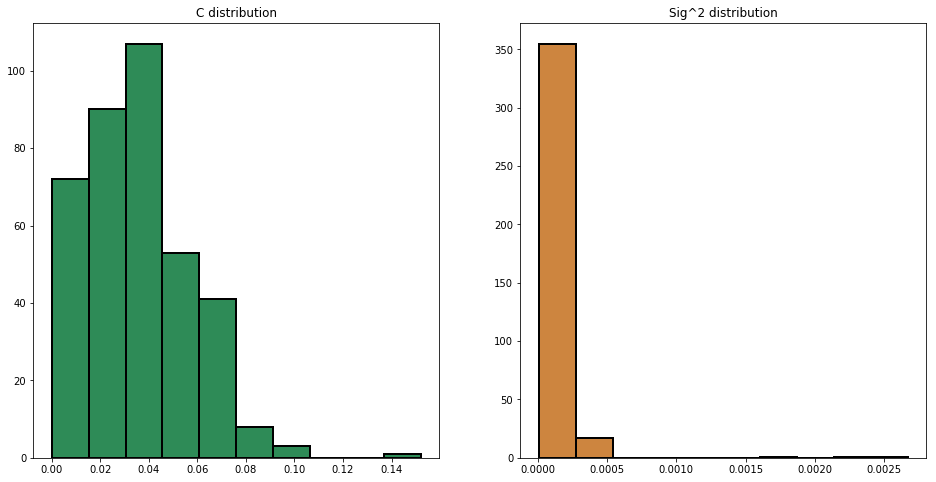

##########################################################################################
Processing 400 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 160100.
nfev: 160111

Residual stats:
Residual RMS: 0.0036652299731574725
Residual Variance: 1.3172409405490466e-05
Flux Lost: 0.007182901428235761
Flux Addition: 0.004789628289986239
Psi1(u-f): 0.0002847806575991047
#Exceeded Pixels: 438
Sharpness: 3.8276614738882926
Psi2(grad u): 0.024912315094775504
Total elapsed time: 1427.2527990341187 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.031971263655400206
Mean min distance between collocation 

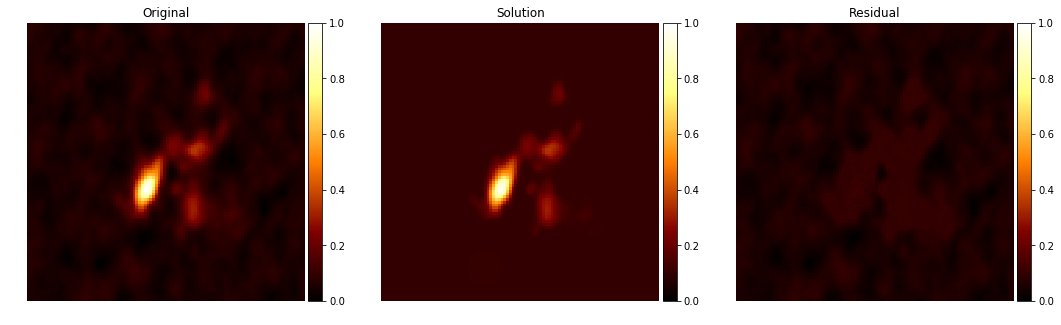

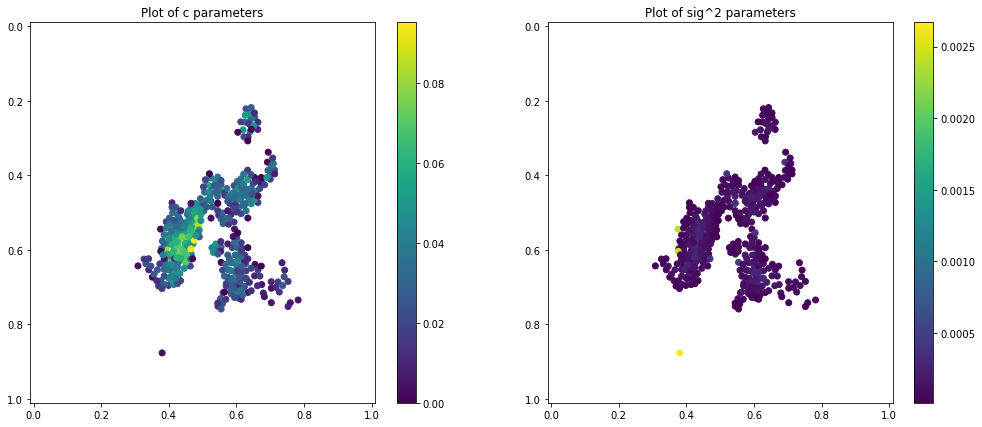

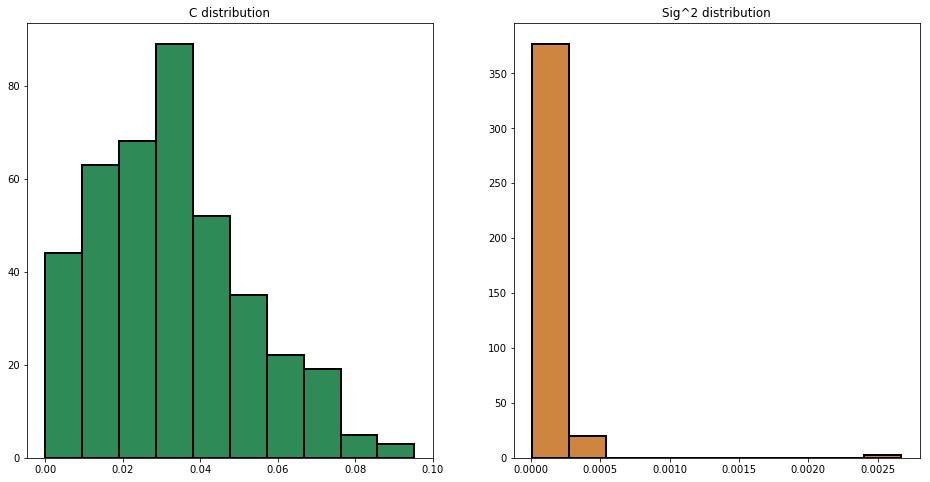

##########################################################################################
Processing 425 centers example
##########################################################################################



In [ ]:
for elm in elm_list:
    print('#'*90)
    print('Processing {0} centers example'.format(len(elm.c)))
    print('#'*90 + '\n')
    nfev = 100*(len(elm.get_params())+1)
    elm_solver(elm, method='standard', max_nfev=nfev)
    
#pickling results
target = open("elm_list.pkl", "wb")
pickle.dump(elm_list, target)
target.close()

## Analysis of results in `Orion KL`

In [4]:
elm_list = pickle.load( open('../results/exp01_orion.pkl', 'rb') )

In [5]:
n_center = np.array( [len(elm.c) for elm in elm_list] )
r_stats = [elm.get_residual_stats() for elm in elm_list]

variance = np.array( [var for (var,_,_,_,_,_,_,_) in r_stats] )
rms = np.array( [rms for (_,_,rms,_,_,_,_,_) in r_stats] )
flux_addition = np.array( [flux for (_,_,_,flux,_,_,_,_) in r_stats] )
psi1 = np.array( [psi1 for (_,_,_,_,psi1,_,_,_) in r_stats] )
npix = np.array( [npix for (_,_,_,_,_,npix,_,_) in r_stats] )
sharpness = np.array( [sharp for (_,_,_,_,_,_,sharp,_) in r_stats] )
psi2 = np.array( [psi2 for (_,_,_,_,_,_,_,psi2) in r_stats] )

times = np.array([elm.elapsed_time for elm in elm_list])

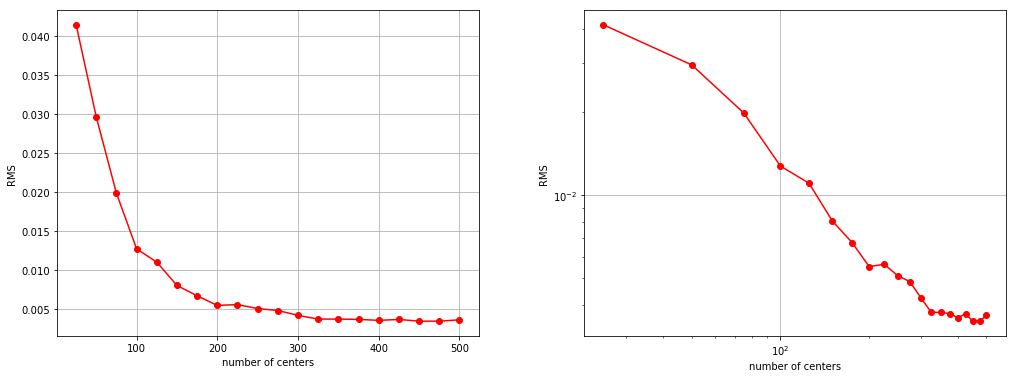

In [6]:
fig = plt.figure(figsize=(17,6))
fig.subplots_adjust(wspace=0.25)
plt.subplot(1,2,1)
plt.plot(n_center, rms, 'ro-')
plt.grid()
plt.xlabel('number of centers')
plt.ylabel('RMS')
plt.subplot(1,2,2)
plt.loglog(n_center, rms, 'ro-')
plt.grid()
plt.xlabel('number of centers')
plt.ylabel('RMS')
plt.show()

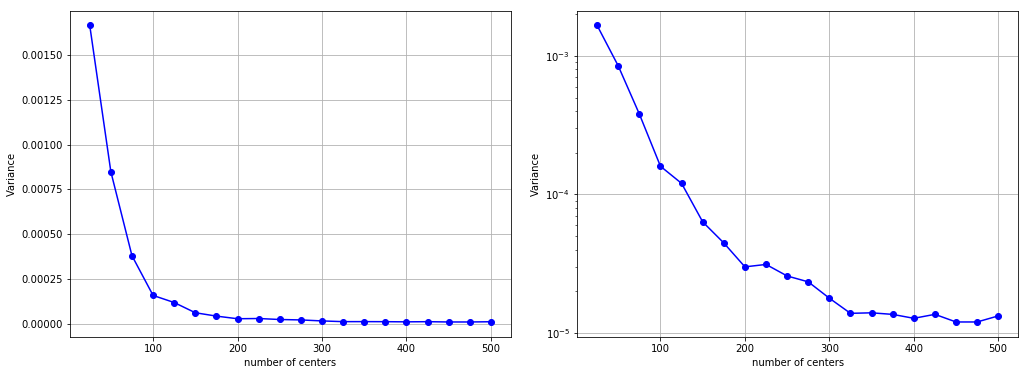

In [7]:
fig = plt.figure(figsize=(17,6))
fig.subplots_adjust(wspace=0.15)
plt.subplot(1,2,1)
plt.plot(n_center, variance, 'bo-')
plt.grid()
plt.xlabel('number of centers')
plt.ylabel('Variance')
plt.subplot(1,2,2)
plt.semilogy(n_center, variance, 'bo-')
plt.grid()
plt.xlabel('number of centers')
plt.ylabel('Variance')
plt.show()

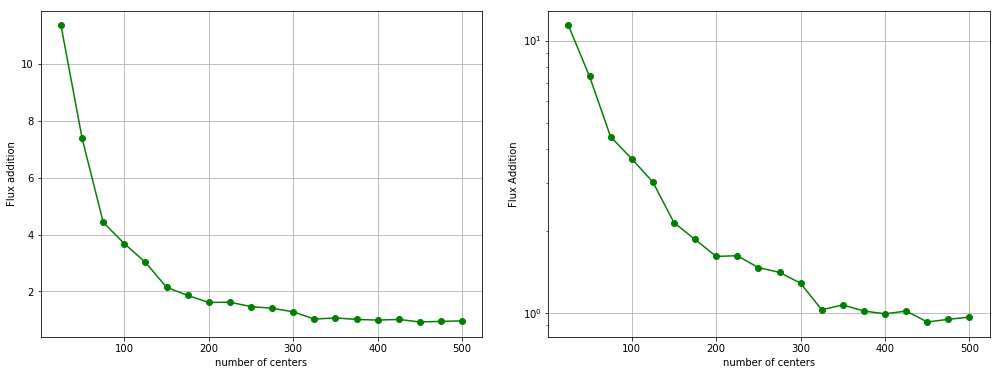

In [9]:
fig = plt.figure(figsize=(17,6))
fig.subplots_adjust(wspace=0.15)
plt.subplot(1,2,1)
plt.plot(n_center, flux_addition, 'go-')
plt.grid()
plt.xlabel('number of centers')
plt.ylabel('Flux addition')
plt.subplot(1,2,2)
plt.semilogy(n_center, flux_addition, 'go-')
plt.grid()
plt.xlabel('number of centers')
plt.ylabel('Flux Addition')
plt.show()

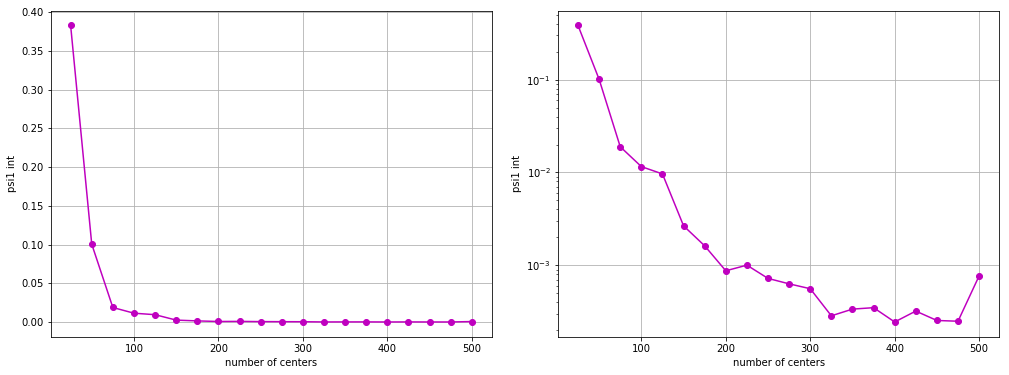

In [10]:
fig = plt.figure(figsize=(17,6))
fig.subplots_adjust(wspace=0.15)
plt.subplot(1,2,1)
plt.plot(n_center, psi1, 'mo-')
plt.grid()
plt.xlabel('number of centers')
plt.ylabel('psi1 int')
plt.subplot(1,2,2)
plt.semilogy(n_center, psi1, 'mo-')
plt.grid()
plt.xlabel('number of centers')
plt.ylabel('psi1 int')
plt.show()

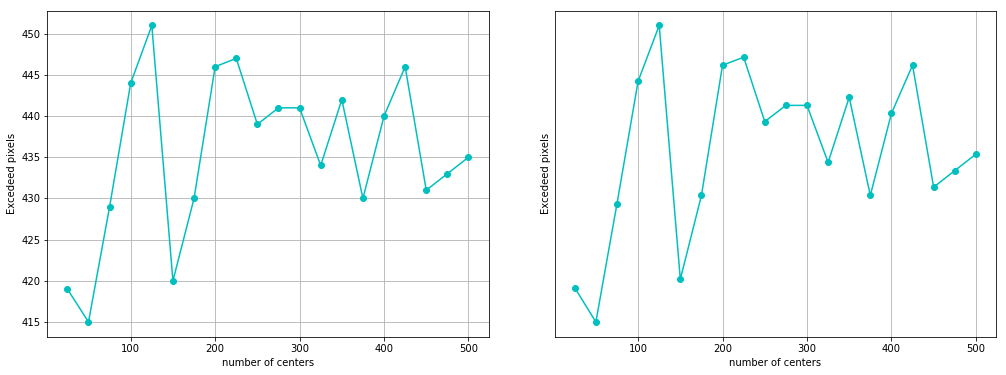

In [11]:
fig = plt.figure(figsize=(17,6))
fig.subplots_adjust(wspace=0.15)
plt.subplot(1,2,1)
plt.plot(n_center, npix, 'co-')
plt.grid()
plt.xlabel('number of centers')
plt.ylabel('Excedeed pixels')
plt.subplot(1,2,2)
plt.semilogy(n_center, npix, 'co-')
plt.grid()
plt.xlabel('number of centers')
plt.ylabel('Excedeed pixels')
plt.show()

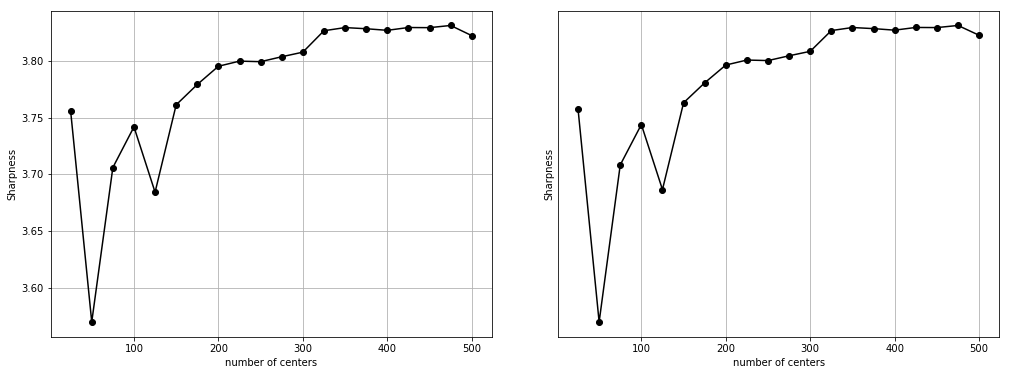

In [12]:
fig = plt.figure(figsize=(17,6))
fig.subplots_adjust(wspace=0.15)
plt.subplot(1,2,1)
plt.plot(n_center, sharpness, 'ko-')
plt.grid()
plt.xlabel('number of centers')
plt.ylabel('Sharpness')
plt.subplot(1,2,2)
plt.semilogy(n_center, sharpness, 'ko-')
plt.grid()
plt.xlabel('number of centers')
plt.ylabel('Sharpness')
plt.show()

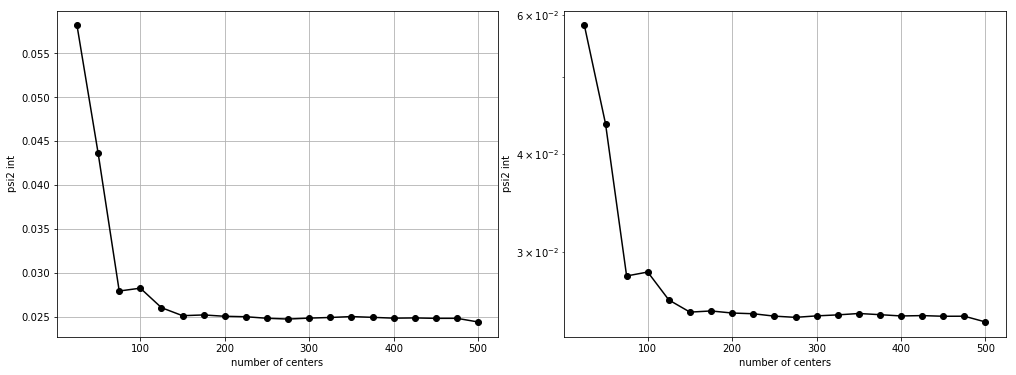

In [13]:
fig = plt.figure(figsize=(17,6))
fig.subplots_adjust(wspace=0.15)
plt.subplot(1,2,1)
plt.plot(n_center, psi2, 'ko-')
plt.grid()
plt.xlabel('number of centers')
plt.ylabel('psi2 int')
plt.subplot(1,2,2)
plt.semilogy(n_center, psi2, 'ko-')
plt.grid()
plt.xlabel('number of centers')
plt.ylabel('psi2 int')
plt.show()

## Analysis of results on `M100`

In [6]:
elm_list = pickle.load( open('../results/exp01_m100.pkl', 'rb') )

In [8]:
n_center = np.array( [len(elm.c) for elm in elm_list] )
r_stats = [elm.get_residual_stats() for elm in elm_list]

variance = np.array( [var for (var,_,_,_,_,_,_,_) in r_stats] )
rms = np.array( [rms for (_,_,rms,_,_,_,_,_) in r_stats] )
flux_addition = np.array( [flux for (_,_,_,flux,_,_,_,_) in r_stats] )
psi1 = np.array( [psi1 for (_,_,_,_,psi1,_,_,_) in r_stats] )
npix = np.array( [npix for (_,_,_,_,_,npix,_,_) in r_stats] )
sharpness = np.array( [sharp for (_,_,_,_,_,_,sharp,_) in r_stats] )
psi2 = np.array( [psi2 for (_,_,_,_,_,_,_,psi2) in r_stats] )

In [16]:
i0 = 3
n_center = n_center[i0:]
variance = variance[i0:]
entropy = entropy[i0:]
rms = rms[i0:]
flux = flux[i0:]

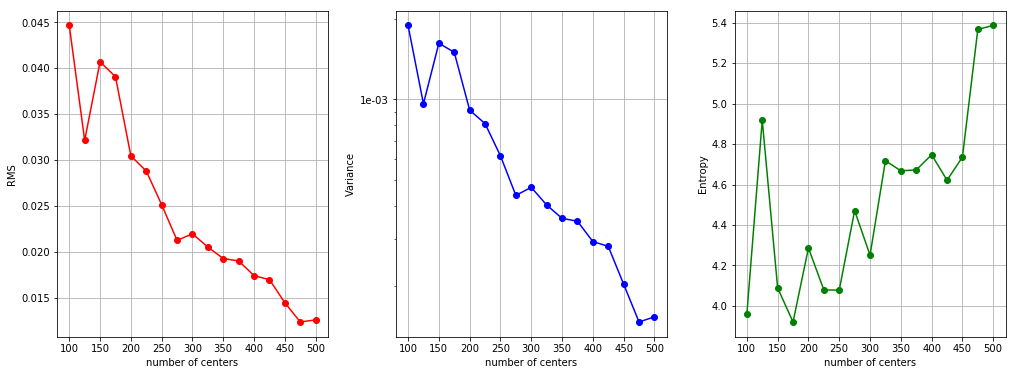

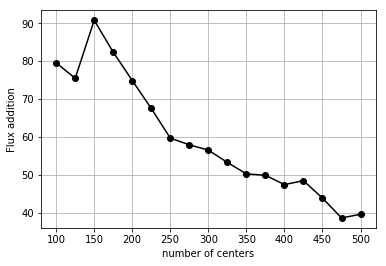

In [17]:
fig = plt.figure(figsize=(17,6))
fig.subplots_adjust(wspace=0.25)
plt.subplot(1,3,1)
plt.plot(n_center, rms, 'ro-')
plt.grid()
plt.xlabel('number of centers')
plt.ylabel('RMS')

ax = plt.subplot(1,3,2)
plt.semilogy(n_center, variance, 'bo-')
plt.grid()
plt.xlabel('number of centers')
plt.ylabel('Variance')
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))

plt.subplot(1,3,3)
plt.plot(n_center, entropy, 'go-')
plt.grid()
plt.xlabel('number of centers')
plt.ylabel('Entropy')

plt.show()


plt.plot(n_center, flux, 'ko-')
plt.grid()
plt.xlabel('number of centers')
plt.ylabel('Flux addition')
plt.show()